## Regime Transiente 1D Difusão de Calor

Equação 2D:

$$\frac{\partial^2 T}{\partial^2 x}  + \frac{\partial^2 T}{\partial^2 y} = \alpha^2 \frac{\partial T}{\partial t}  \tag{1}$$

Onde difusividade térmica é:

$$ \alpha^2 = \frac{k}{\rho c} $$ em $ \frac{m^2}{s} $

Simplicando para o caso 1D:

$$\frac{\partial^2 T}{\partial^2 x}  = \alpha^2 \frac{\partial T}{\partial t}  \tag{2}$$

Em um grid regular, utilizando discretização em diferenças finitas usando diferenças centradas para o espaço:

O indice de tempo é **n** e indice do eixo x é **i**.  

$$
\frac{\partial^2 T^n_i}{\partial^2 x}  = \frac{T_{i+1}^n-2T_{i}^n+T_{i-1}^n}{\Delta x^2}  
\tag{3}
$$


e diferença progressiva para o tempo nos indices de tempo **n** e **n+1** ("futuro"):

$$ \frac{\partial T_{i}^n}{\partial t} = \frac{T_i^{n+1}-T_i^n}{\Delta t} \tag{4} $$






Combinando as equações (2), (3) e (4) chegamos em um esquema de "marcha" em (5). Onde os valores **n+1** ("futuro") podem ser calculados a partir dos valores em **n**: 

$$ \frac{T_i^{n+1}-T_i^n}{\Delta t} \alpha^2  = \frac{T_{i+1}^n-2T_{i}^n+T_{i-1}^n}{\Delta x^2} $$


$$ T_i^{n+1} = \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2}\left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n $$

$$ T_i^{n+1} = \lambda \left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n \tag{5}$$

onde:

$$ \lambda = \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} \tag{6} $$ 

Para garantir estabilidade numérica do esquema (Von Neumann)  $\lambda \leq 2$

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 1.
Reproduza o exemplo mostrado onde uma barra e discretizada com 6 pontos. Rodando tempo suﬁciente para
encontrar a solucao de equilıbrio e compare qualitativamente com os resultados mostrados no exemplo;

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt

Lambda satisfaz condição de estabilidade < 2?  True
Wall time: 43 ms


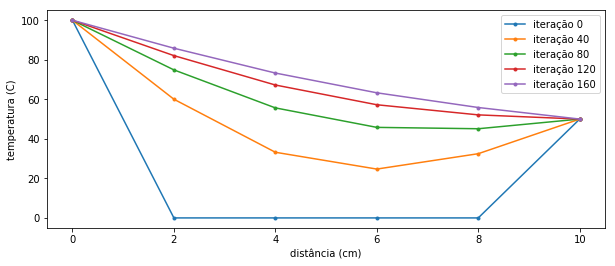

In [124]:
%%time
import numpy as np

k = 0.835 #K alumínio = 1/alfa^2
dx = 2 # discretização espaço 
dt = 0.1 # discretiuzação tempo 
lmbda = (k*dt)/dx 
print('Lambda satisfaz condição de estabilidade < 2? ',  lmbda < 2.)

tbarra = np.zeros((2, 6)) # temperatura da barra em tn e tn+1 : 2 arrays de 6 posições
# condições iniciais no tempo 0
tbarra[0, 0] = 100. # tn 
tbarra[0, 5] = 50. # tn

# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))

for n in range(200): # 000 iterações : escolha arbitrário
    # a cada 20 iterações plota a temperatura da barra
    if n%40==0:
        plt.plot(np.arange(6)*dx, tbarra[0, :], '.-',label='iteração '+str(n))
        plt.ylabel('temperatura (C)')
        plt.xlabel('distância (cm)')
    # calcula equação 5 em todas as posições da barra exceto contornos (i : 0 e 5)
    for i in range(1, 5):         
        # tn+1 = f(tn)
        tbarra[1, i] = lmbda*(tbarra[0, i+1] -2*tbarra[0, i]+tbarra[0, i-1]) + tbarra[0, i]     
    # tn+1 = tn  atualiza os array de tempo agora n+1 é n
    tbarra[0, 1:5] = tbarra[1, 1:5]

# plota legenda
plt.legend()

_________________________________________________________

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 2. 
Aumente o n´umero de pontos na dire¸c˜ao espacial x (diminuindo o espa¸camento Δx), mantendo o mesmo
problema f´ısico, tanto as dimens˜oes quanto as propriedades f´ısicas. OBS: Fique atento ao crit´erio de
estabilidade num´erica λ ≤ 1/2, escolhendo um intervalo de tempo Δt apropriado. UTILIZE O
MESMO λ ADOTADO NO ITEM ANTERIOR;

Aumentando o número de pontos  no eixo **x** igual á N.

Novo delta x será:
$$ N*\Delta x = 10 cm$$
$$ \Delta x = \frac{10 cm}{N} $$

Qual o $\Delta t$ adequado?  
A equação (6) responde abaixo:  

$$ \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} \leq 2 $$ 


$$ \Delta t \leq 2 \frac{1}{\alpha^2 } \Delta x^2  $$ 
$$ \Delta t \leq 2 *0.835 \Delta x^2  $$ 
$$ \Delta t \leq 2 *0.835 *0.1^2  $$ 
$$ \Delta t \leq 0.0167 $$ 

Mas devemos usar o mesmo $\lambda$ do item 1. logo:  

$$ \frac{1}{\alpha^2 } \frac{\Delta t}{\Delta x^2} = 0.04175 $$
$$ k \frac{\Delta t}{\Delta x^2} = 0.04175 $$
$$ \Delta t = \frac{\Delta x^2  0.04175}{k}$$

Para N = 100  
$$ \Delta t = 0.0005 $$

A equação (5) pode ser escrita como uma convolução:


$$ T_i^{n+1} = \lambda \left(T_{i+1}^n-2T_{i}^n+T_{i-1}^n\right)  + T_i^n $$

Sendo o operador de diferenciação na direção x substituido pelo kernel : `[1, -2, 1]`

$$ T_i^{n+1} = \lambda \left(T_i^n \circledast \left[1, -2, 1\right] \right)  + T_i^n $$

  
Nota .: A convolução deve ser somente para região de "sobreposição" (overlap) completo. (numpy 'valid' mode)

Lambda satisfaz condição de estabilidade < 2?  True
Wall time: 6.96 s


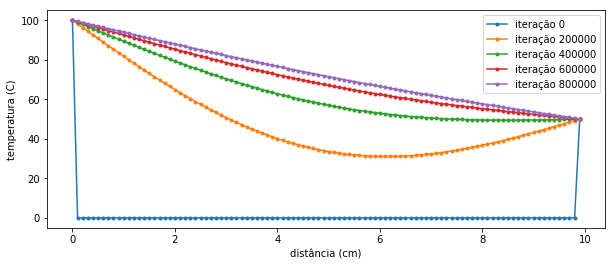

In [140]:
%%time
import numpy as np
from scipy.signal import fftconvolve

N = 100 # numero de pontos
k = 0.835 #K alumínio = 1/alfa^2
dx = 10./N # 10 cm / N pontos discretização espaço 
dt = (dx**2*0.04175)/k # discretização tempo garantindo lambda igual à 0.04175
lmbda = (k*dt)/dx 
print('Lambda satisfaz condição de estabilidade < 2? ',  lmbda < 2.)

tbarra = np.zeros((2, N)) # temperatura da barra em tn e tn+1 : 2 arrays de N posições
# condições iniciais no tempo 0
tbarra[0, 0] = 100. # tn 
tbarra[0, -1] = 50. # tn

# tamanho da figura dimensões em polegadas
plt.figure(figsize=(10,4))

for n in range(int(1e6)): # 1000000 iterações : escolha arbitrário
    # a cada algumas iterações plota a temperatura da barra
    if n%int(20e4)==0:
        plt.plot(np.arange(N)*dx, tbarra[0, :], '.-', label='iteração '+str(n))
        plt.ylabel('temperatura (C)')
        plt.xlabel('distância (cm)')
    # calcula equação 5 em todas as posições da barra exceto contornos (i : 0 e N-1)    
    # com covolução
    # fftconvolve melhor p/ N > 500
    # tn+1 = f(tn)
    tbarra[1, 1:-1] = lmbda*(np.convolve(np.array([1, -2, 1]), tbarra[0, :], mode='valid')) + tbarra[0, 1:-1] 
    # tn+1 = tn  atualiza os array de tempo agora n+1 é n
    tbarra[0, 1:-1] = tbarra[1, 1:-1]
    # sem convolução 25X mais devagar N=100  
#     for i in range(1, n-1):
#         # tn+1 = f(tn)
#         tbarra[1, i] = lmbda*(tbarra[0, i+1] -2*tbarra[0, i]+tbarra[0, i-1]) + tbarra[0, i]     
#         # tn+1 = tn  atualiza os array de tempo agora n+1 é n
#         tbarra[0, 1:-1] = tbarra[1, 1:-1]

# plota legenda
plt.legend()

_________________________________________________________

_________________________________________________________

_________________________________________________________

_________________________________________________________

# 3.
Compare os erros das solu¸c˜oes num´ericas de equil´ıbrio (nos 2 casos anteriores) em rela¸c˜ao `a solu¸c˜ao anal´ıtica
(uma reta que passa pelos pontos de temperatura 100◦e 50◦C nos extremos), em especial no caso de utiliza¸c˜ao
de λ = 1/6 (que tende a minimizar os erros);